In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [248]:
df=pd.read_csv(r"C:\Users\SKAN\Downloads\Copper_Set.xlsx - Result 1.csv")

In [249]:
df


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [251]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


# Dealing With Data in Wrong Format

In [252]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [253]:
df["item_date"]=pd.to_datetime(df["item_date"]).dt.date
df["quantity tons"]=pd.to_numeric(df["quantity tons"],errors='coerce')
df["customer"]=pd.to_numeric(df["customer"],errors='coerce')
df["country"]=pd.to_numeric(df["country"],errors='coerce')
df["application"]=pd.to_numeric(df["application"],errors='coerce')
df["thickness"]=pd.to_numeric(df["thickness"],errors='coerce')
df["width"]=pd.to_numeric(df["width"],errors='coerce')
df["material_ref"]=df["material_ref"].str.lstrip('0')
df["product_ref"]=pd.to_numeric(df["product_ref"],errors='coerce')
df["delivery date"]=pd.to_datetime(df["delivery date"]).dt.date
df["selling_price"]=pd.to_numeric(df["selling_price"],errors='coerce')




In [254]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,1970-01-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,1970-01-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,1970-01-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,1970-01-01,601.00


In [255]:
df["item_date"]=df["item_date"].astype("datetime64[ns]")
df["delivery date"]=df["delivery date"].astype("datetime64[ns]")

In [256]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [257]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [258]:
def missing_check(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count().sort_values(ascending=False))
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data
missing_check(df)

,Total,Percent
material_ref,77919,0.428897
country,28,0.000154
application,24,0.000132
id,2,0.000011
status,2,0.000011
item_date,1,0.000006
quantity tons,1,0.000006
customer,1,0.000006
thickness,1,0.000006
delivery date,1,0.000006


# Dealing with the missing values

In [259]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
df['material_ref'].fillna('unknown', inplace=True)


In [260]:
df.isnull().sum()

id                2
item_date         1
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [261]:
df=df.dropna()

In [262]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [299]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,1970-01-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,1970-01-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,1970-01-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,1970-01-01,601.00


<Axes: xlabel='width'>

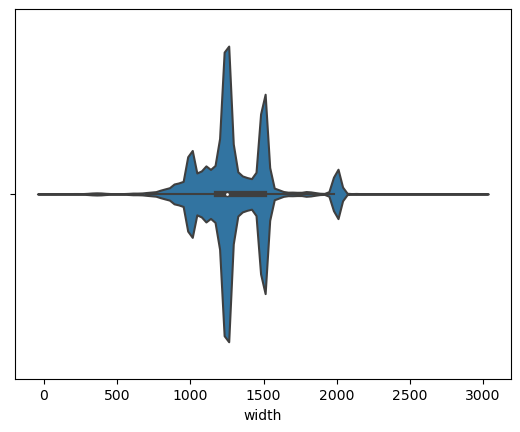

In [114]:
sns.violinplot(x=df["width"])

<Axes: xlabel='application'>

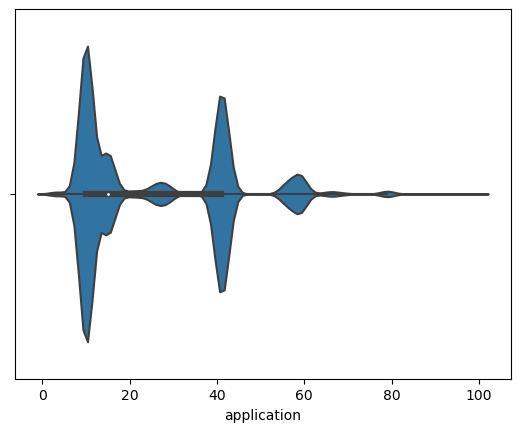

In [163]:
sns.violinplot(x=df["application"])

<Axes: xlabel='country'>

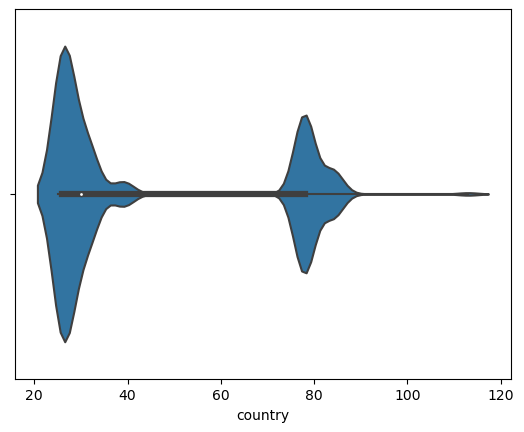

In [164]:
sns.violinplot(x=df["country"])

<Axes: >

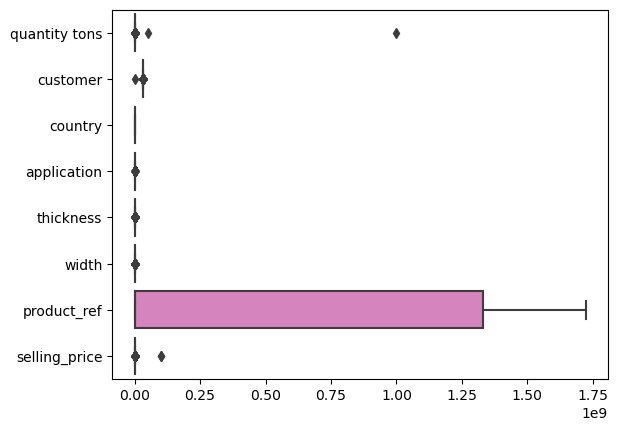

In [171]:
sns.boxplot(data=df,orient='h')

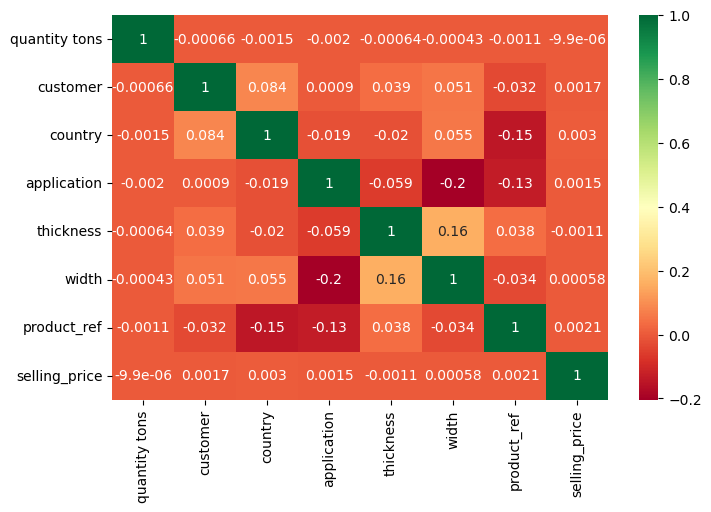

In [169]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

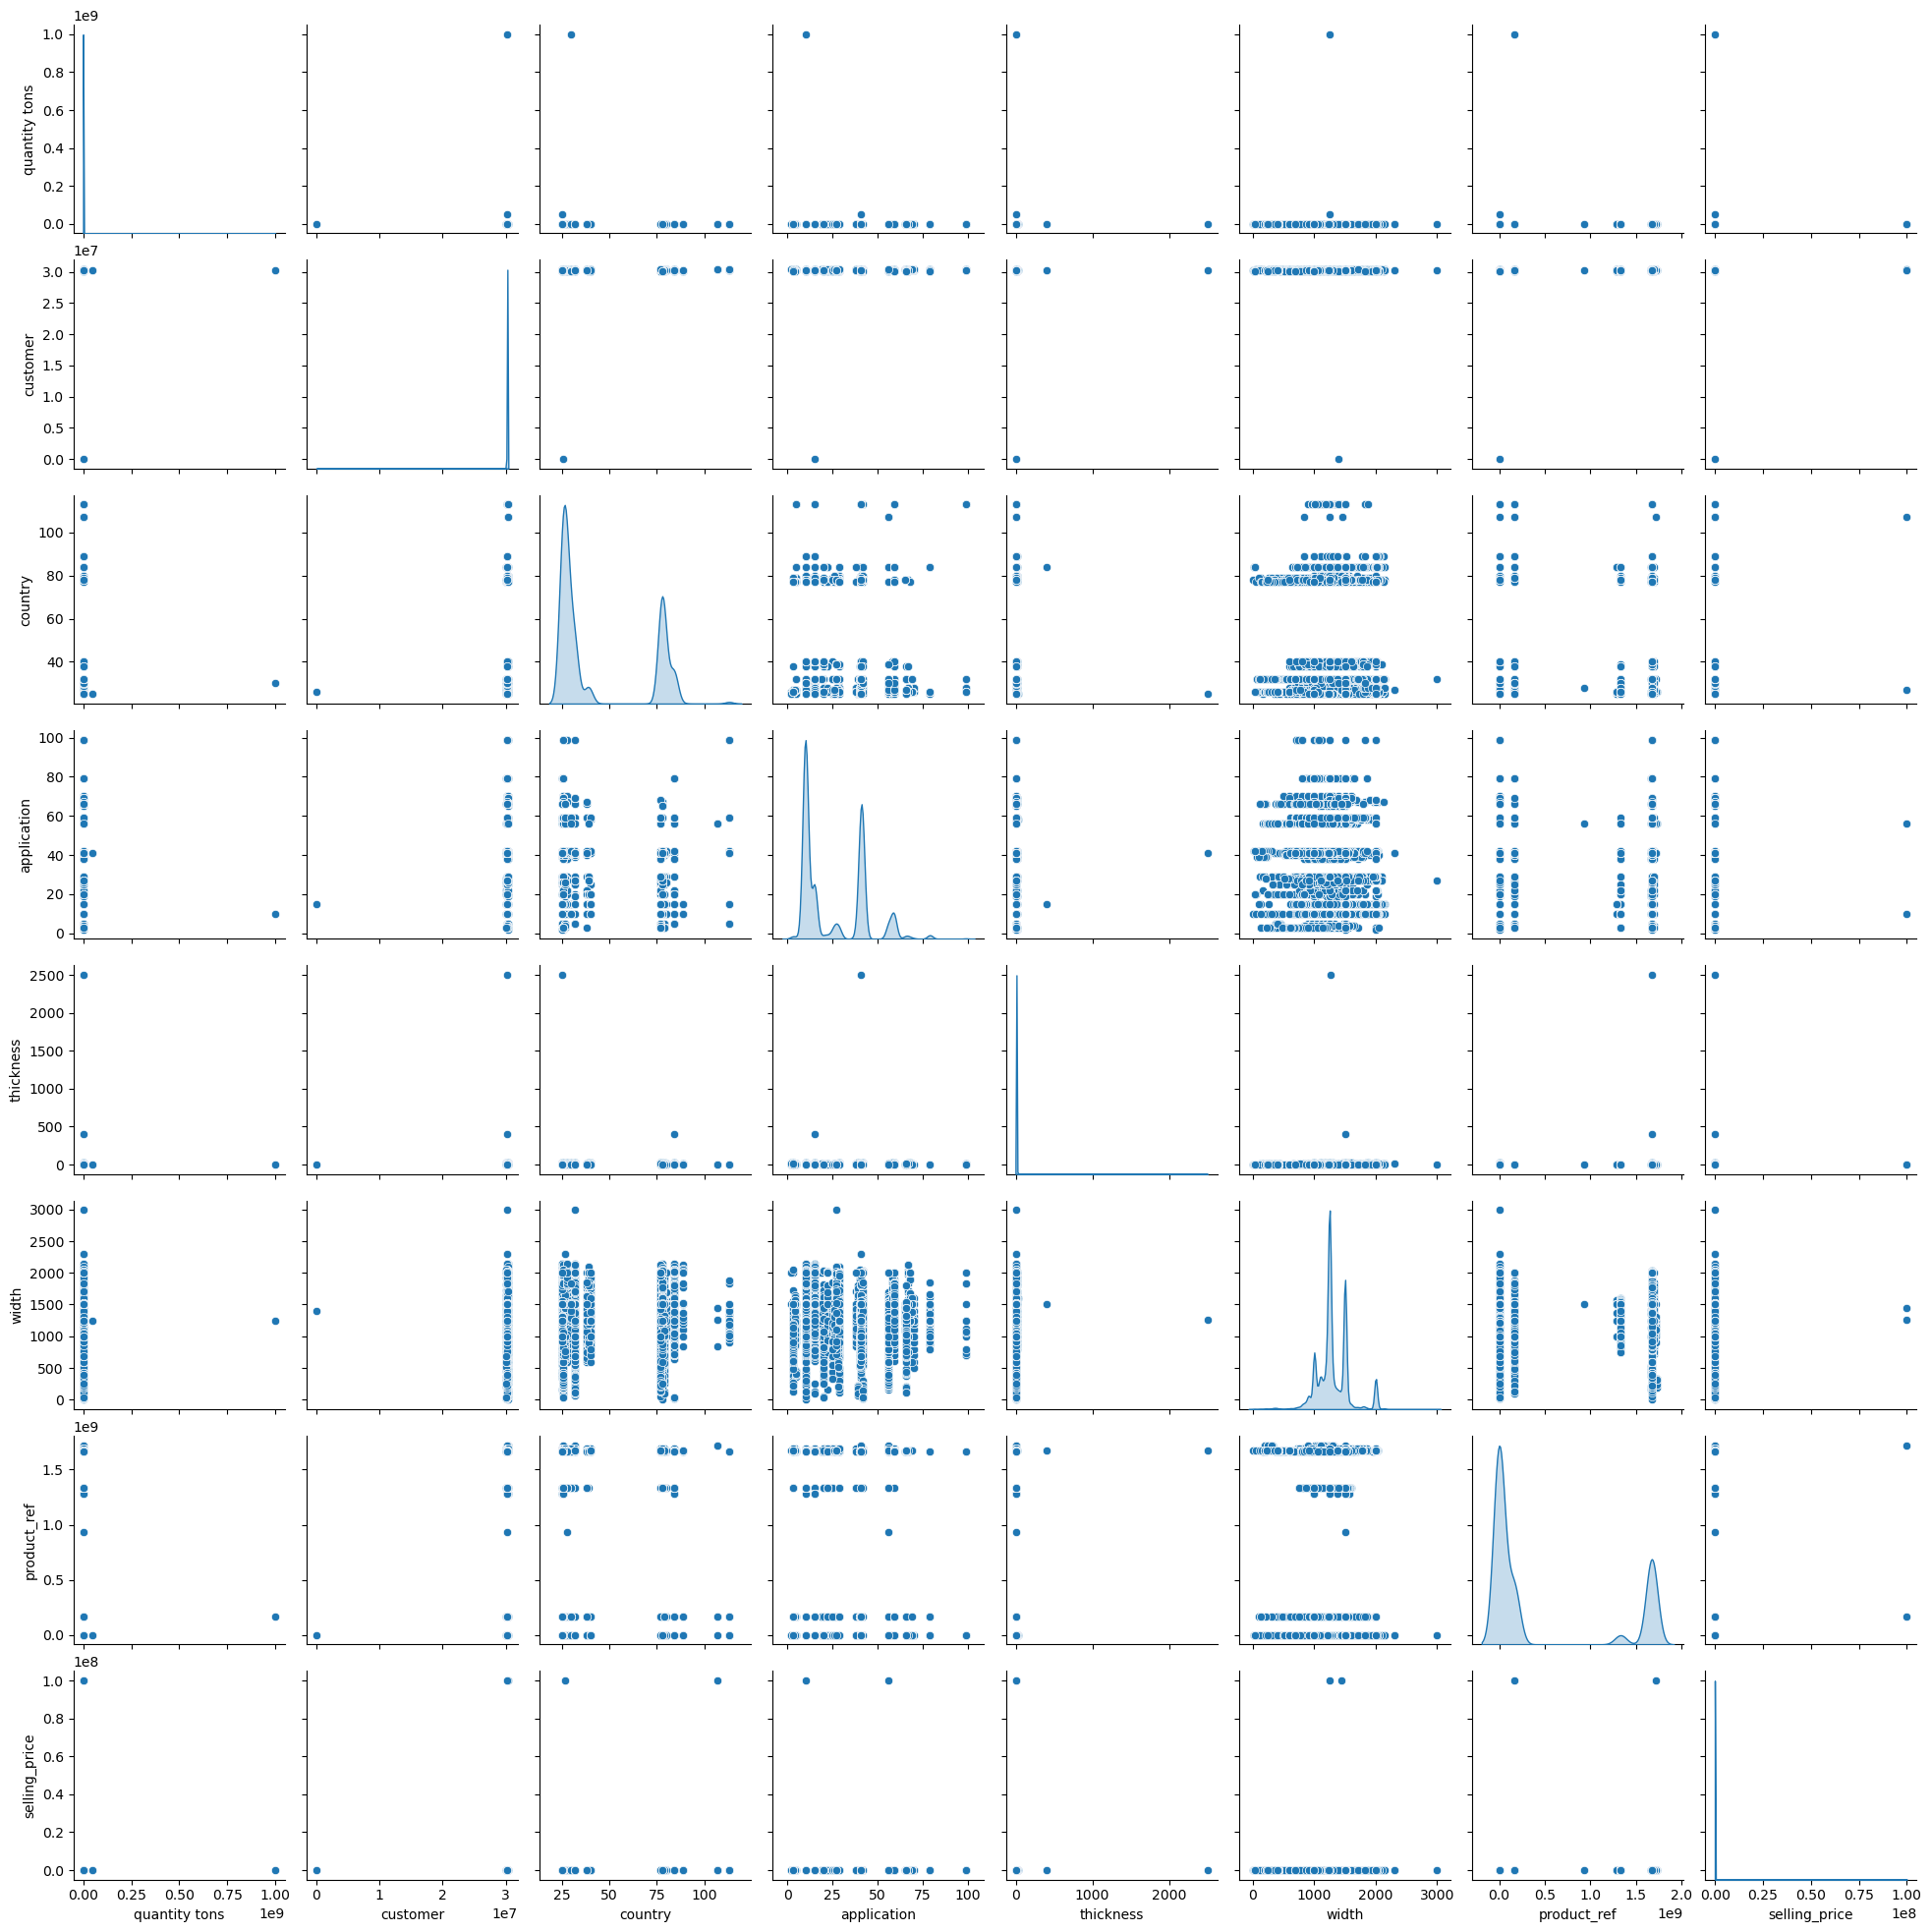

In [170]:
sns.pairplot(df,diag_kind='kde')

In [300]:
df1=df.copy()

In [301]:
a = df1['selling_price'] <= 0
print(a.sum())
df1.loc[a, 'selling_price'] = np.nan

a = df1['quantity tons'] <= 0
print(a.sum())
df1.loc[a, 'quantity tons'] = np.nan

a = df1['thickness'] <= 0
print(a.sum())

7
4
0


In [302]:
df1.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [303]:
df1 = df1.dropna()

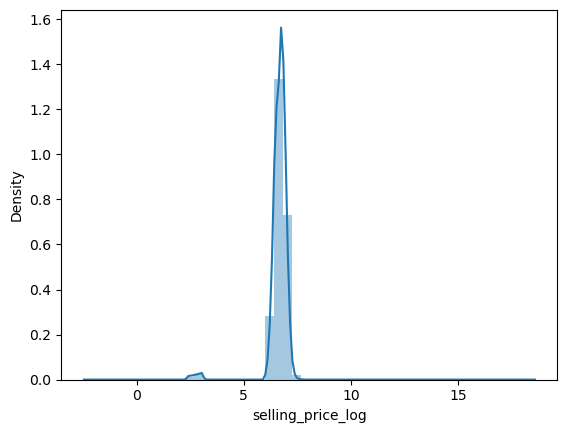

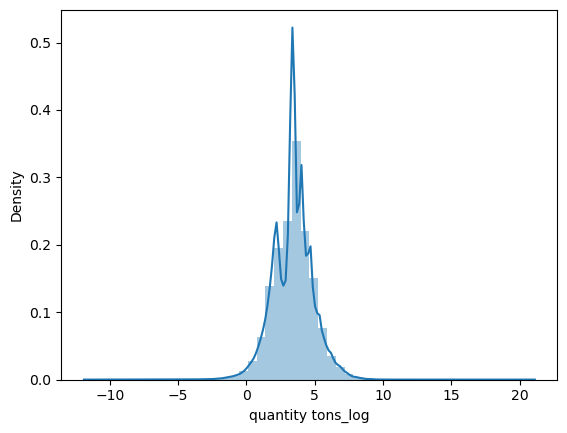

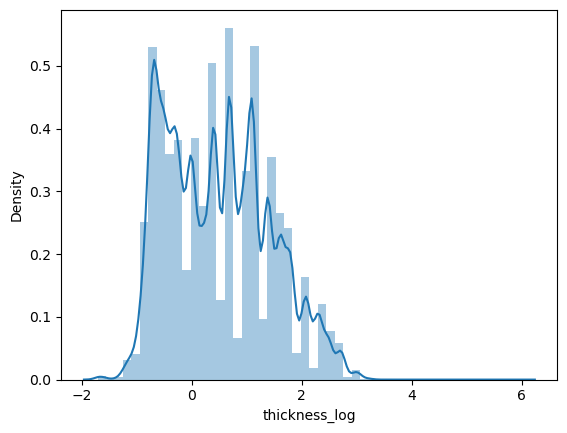

In [304]:
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()

df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()
# reverts log
# sns.distplot(df_p['reverted_values'])

In [305]:
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1970-01-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,1970-01-01,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,1970-01-01,602.00,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,1970-01-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,1970-01-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,1970-01-01,619.00,6.428105,1.443523,-0.342490


# Regression Model

In [23]:
#1 Encode categorical features
#2 Test and Train split
#3 Define Hyperparameters for GridSearchCV
#4 Train the multiple model to get best model
#5 Evalution metrics
#6 Predict the selling price for new values
#7 Save the DecisionTreeRegressor model

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [307]:
df1["item type"].value_counts()

W         105600
S          69203
PL          5659
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [308]:
item_type=pd.get_dummies(df1["item type"],drop_first=True)
item_type

,Others,PL,S,SLAWR,W,WI
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
181667,0,0,0,0,1,0
181668,0,0,0,0,1,0
181669,0,0,0,0,1,0
181670,0,0,0,0,1,0


In [309]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [310]:
df1.drop(["id","item_date","quantity tons","material_ref","delivery date","selling_price","thickness","item type","status"],axis=1,inplace=True)

In [311]:
df1

,customer,country,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log
0,30156308.0,28.0,10.0,1500.0,1670798778,6.749931,3.991779,0.693147
1,30202938.0,25.0,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144
2,30153963.0,30.0,28.0,952.0,628377,6.468211,5.956169,-0.967584
3,30349574.0,32.0,59.0,1317.0,1668701718,6.643790,5.310301,0.832909
4,30211560.0,28.0,10.0,2000.0,640665,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,41.0,1240.0,164141591,6.400257,4.670802,-0.040822
181668,30200854.0,25.0,41.0,1220.0,164141591,6.381816,4.629691,-0.040822
181669,30200854.0,25.0,41.0,1500.0,164141591,6.378426,5.337954,-0.051293
181670,30200854.0,25.0,41.0,1250.0,164141591,6.428105,1.443523,-0.342490


In [312]:
df1=pd.concat([df1,item_type],axis=1)

In [313]:
df1

,customer,country,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log,Others,PL,S,SLAWR,W,WI
0,30156308.0,28.0,10.0,1500.0,1670798778,6.749931,3.991779,0.693147,0,0,0,0,1,0
1,30202938.0,25.0,41.0,1210.0,1668701718,6.953684,6.643822,-0.223144,0,0,0,0,1,0
2,30153963.0,30.0,28.0,952.0,628377,6.468211,5.956169,-0.967584,0,0,0,0,0,1
3,30349574.0,32.0,59.0,1317.0,1668701718,6.643790,5.310301,0.832909,0,0,1,0,0,0
4,30211560.0,28.0,10.0,2000.0,640665,6.357842,6.666354,1.386294,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.0,25.0,41.0,1240.0,164141591,6.400257,4.670802,-0.040822,0,0,0,0,1,0
181668,30200854.0,25.0,41.0,1220.0,164141591,6.381816,4.629691,-0.040822,0,0,0,0,1,0
181669,30200854.0,25.0,41.0,1500.0,164141591,6.378426,5.337954,-0.051293,0,0,0,0,1,0
181670,30200854.0,25.0,41.0,1250.0,164141591,6.428105,1.443523,-0.342490,0,0,0,0,1,0


In [314]:
#split data into X, y
x=df1.drop(["selling_price_log"],axis=1)
y=df1['selling_price_log']

In [315]:
x.shape

(181624, 13)

In [316]:
# independent features after encoding
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [317]:
x.shape

(181624, 13)

In [318]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127136, 13)
(54488, 13)
(127136,)
(54488,)


In [319]:
print(x)

[[-7.57723190e-01 -6.92247048e-01 -8.79556221e-01 ... -2.34646768e-03
   8.48483496e-01 -5.37906037e-02]
 [-2.94039684e-01 -8.15175538e-01  8.66522524e-01 ... -2.34646768e-03
   8.48483496e-01 -5.37906037e-02]
 [-7.81041607e-01 -6.10294722e-01  1.34295954e-01 ... -2.34646768e-03
  -1.17857331e+00  1.85906075e+01]
 ...
 [-3.14762747e-01 -8.15175538e-01  8.66522524e-01 ... -2.34646768e-03
   8.48483496e-01 -5.37906037e-02]
 [-3.14762747e-01 -8.15175538e-01  8.66522524e-01 ... -2.34646768e-03
   8.48483496e-01 -5.37906037e-02]
 [-3.14762747e-01 -8.15175538e-01  8.66522524e-01 ... -2.34646768e-03
   8.48483496e-01 -5.37906037e-02]]


In [290]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [33]:
#Find the best model with the help of GridSearchCV

In [34]:
lr = LinearRegression()
svr =  SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn=KNeighborsRegressor()


models = [lr, svr, dtr, rf,knn]
scores = []

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    mse = metrics.mean_squared_error(y_test,y_pred) * 100
    mae = metrics.mean_absolute_error(y_test, y_pred) * 100
    r2_score=metrics.r2_score(y_test,y_pred)   
    scores.append([mse, mae,r2_score])

In [36]:
scores_df = pd.DataFrame(columns=['Model'], data=['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest','KNN'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['MSE', 'MAE', 'R2_Score'])], axis=1)
df_sc=scores_df.sort_values(["R2_Score"],ascending=False)
print(df_sc.to_markdown())

|    | Model             |     MSE |     MAE |   R2_Score |
|---:|:------------------|--------:|--------:|-----------:|
|  3 | Random Forest     | 2.35725 | 10.669  |   0.92783  |
|  4 | KNN               | 3.29834 | 13.3792 |   0.899017 |
|  1 | SVR               | 3.78877 | 15.4315 |   0.884002 |
|  2 | Decision Tree     | 4.18011 | 12.6162 |   0.87202  |
|  0 | Linear Regression | 4.66638 | 17.2506 |   0.857132 |


# Hyper parameter tuning

In [31]:
rf=RandomForestRegressor()

In [32]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 4, 8, 16],
    "bootstrap": [True, False]
}

In [33]:
grid = GridSearchCV(rf, param_grid, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
grid.fit(x_train,y_train)
grid.cv_results_

{'mean_fit_time': array([5.09692669e-02, 4.15734291e-02, 8.27491760e-02, 8.79467487e-02,
        3.93776894e-02, 3.71773720e-02, 3.85779381e-02, 3.47774982e-02,
        3.45794201e-02, 3.85775566e-02, 4.11740303e-02, 3.79771233e-02,
        4.81712341e-02, 4.11756039e-02, 4.67696667e-02, 4.17756557e-02,
        8.48673105e+00, 5.69014871e+01, 1.04469369e+02, 1.72869521e+02,
        6.31408091e+00, 3.37556514e+01, 6.43022931e+01, 1.21946523e+02,
        5.00649147e+00, 2.52073568e+01, 5.00035679e+01, 1.42449555e+02,
        6.97069397e+00, 3.06602336e+01, 7.25116912e+01, 1.13290884e+02,
        1.07165999e+01, 5.09772437e+01, 1.00387967e+02, 1.82305265e+02,
        6.27990332e+00, 3.17520945e+01, 6.48217725e+01, 1.45274642e+02,
        5.34588151e+00, 4.51399876e+01, 9.40374409e+01, 1.14254295e+02,
        4.29953289e+00, 2.13977192e+01, 4.51330398e+01, 8.66286395e+01,
        3.23813915e-02, 3.05810928e-02, 3.29821110e-02, 2.97821045e-02,
        3.43805790e-02, 2.97816277e-02, 3.27792

In [36]:
df=pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050969,0.015840,0.000000,0.000000,True,auto,2,10,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
1,0.041573,0.019154,0.000000,0.000000,True,auto,2,50,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
2,0.082749,0.009982,0.000000,0.000000,True,auto,2,100,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
3,0.087947,0.017207,0.000000,0.000000,True,auto,2,200,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
4,0.039378,0.003259,0.000000,0.000000,True,auto,4,10,"{'bootstrap': True, 'max_features': 'auto', 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,127.222248,0.737831,2.625373,0.069343,False,log2,8,200,"{'bootstrap': False, 'max_features': 'log2', '...",-0.027059,-0.020967,-0.021547,-0.020963,-0.026946,-0.023496,0.002871,11
92,5.348680,0.050141,0.106335,0.006970,False,log2,16,10,"{'bootstrap': False, 'max_features': 'log2', '...",-0.027802,-0.022182,-0.022562,-0.021694,-0.027373,-0.024322,0.002683,33
93,27.546103,0.105224,0.555456,0.025476,False,log2,16,50,"{'bootstrap': False, 'max_features': 'log2', '...",-0.026629,-0.020678,-0.021412,-0.020990,-0.026530,-0.023248,0.002731,5
94,55.006464,0.433965,1.073334,0.041942,False,log2,16,100,"{'bootstrap': False, 'max_features': 'log2', '...",-0.026623,-0.020643,-0.021396,-0.020831,-0.026637,-0.023226,0.002790,4


In [38]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 16,
 'n_estimators': 200}

In [320]:
rf=RandomForestRegressor(bootstrap=False,
 max_features='log2',
 min_samples_split= 16,
 n_estimators= 200)

In [321]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='log2',
                      min_samples_split=16, n_estimators=200)

In [322]:
x_pred=rf.predict(x_train)

In [323]:
y_pred=rf.predict(x_test)

In [324]:
from sklearn import metrics

# Metrics for Regression

In [325]:
metrics.mean_squared_error(y_test,y_pred)

0.18051906984240076

In [326]:
metrics.mean_absolute_error(y_test, y_pred)

0.17963674210642624

In [327]:
print(metrics.r2_score(y_test,y_pred))

0.44731596476959046


In [ ]:
#Saving the model into pickle file

In [328]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\copper\model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [238]:
#Load the model and check the metrics

In [329]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\copper\model.pkl', 'rb') as file:
    plr= pickle.load(file)

In [242]:
x.iloc[0]

customer             3.015631e+07
country              2.800000e+01
application          1.000000e+01
width                1.500000e+03
product_ref          1.670799e+09
quantity tons_log    3.991779e+00
thickness_log        6.931472e-01
Others               0.000000e+00
PL                   0.000000e+00
S                    0.000000e+00
SLAWR                0.000000e+00
W                    1.000000e+00
WI                   0.000000e+00
Name: 0, dtype: float64

In [330]:
array=[[30156308.0,28.0,10.0,1500.0,1670798778,3.991779,0.693147,0,0,0,0,1,0]]


In [331]:
result=plr.predict(array)
print(result)


[6.7564599]


# Actual value is 6.749931 model gives the result is 6.7564599

In [332]:
print(metrics.r2_score(y_test,y_pred))

0.44731596476959046


# Classification Model

In [333]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,roc_curve,roc_auc_score

In [334]:
df.status.value_counts()

Won                116006
Lost                34432
Not lost for AM     19568
Revised              4276
To be approved       4168
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [347]:
dfc = df.copy()

In [348]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150438

In [349]:
dfc

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,1970-01-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,1970-01-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,1970-01-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,1970-01-01,601.00


In [350]:
dfc['status'].value_counts()

Won     116006
Lost     34432
Name: status, dtype: int64

In [351]:
dfc["status"]=dfc["status"].map({"Won":1,"Lost":0})

In [352]:
dfc

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,104991,1668701718,1970-01-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01,785.526262,30211560.0,28.0,1,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01,102.482422,30200854.0,25.0,1,W,41.0,0.96,1220.0,1000777,164141591,1970-01-01,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01,208.086469,30200854.0,25.0,1,W,41.0,0.95,1500.0,1000227,164141591,1970-01-01,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01,4.235594,30200854.0,25.0,1,W,41.0,0.71,1250.0,1004216,164141591,1970-01-01,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01,-2000.000000,30200854.0,25.0,1,W,41.0,0.85,1250.0,1001149,164141591,1970-01-01,601.00


In [353]:
item_type1=pd.get_dummies(dfc["item type"],drop_first=True)
item_type1

,Others,PL,S,SLAWR,W,WI
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
181668,0,0,0,0,1,0
181669,0,0,0,0,1,0
181670,0,0,0,0,1,0
181671,0,0,0,0,1,0


In [354]:
dfc.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [355]:
dfc.drop(["id","item_date","material_ref","delivery date","selling_price","item type"],axis=1,inplace=True)

In [356]:
dfc

,quantity tons,customer,country,status,application,thickness,width,product_ref
0,54.151139,30156308.0,28.0,1,10.0,2.00,1500.0,1670798778
1,768.024839,30202938.0,25.0,1,41.0,0.80,1210.0,1668701718
2,386.127949,30153963.0,30.0,1,28.0,0.38,952.0,628377
3,202.411065,30349574.0,32.0,1,59.0,2.30,1317.0,1668701718
4,785.526262,30211560.0,28.0,1,10.0,4.00,2000.0,640665
...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,41.0,0.96,1220.0,164141591
181669,208.086469,30200854.0,25.0,1,41.0,0.95,1500.0,164141591
181670,4.235594,30200854.0,25.0,1,41.0,0.71,1250.0,164141591
181671,-2000.000000,30200854.0,25.0,1,41.0,0.85,1250.0,164141591


In [357]:
dfc=pd.concat([dfc,item_type1],axis=1)
dfc

,quantity tons,customer,country,status,application,thickness,width,product_ref,Others,PL,S,SLAWR,W,WI
0,54.151139,30156308.0,28.0,1,10.0,2.00,1500.0,1670798778,0,0,0,0,1,0
1,768.024839,30202938.0,25.0,1,41.0,0.80,1210.0,1668701718,0,0,0,0,1,0
2,386.127949,30153963.0,30.0,1,28.0,0.38,952.0,628377,0,0,0,0,0,1
3,202.411065,30349574.0,32.0,1,59.0,2.30,1317.0,1668701718,0,0,1,0,0,0
4,785.526262,30211560.0,28.0,1,10.0,4.00,2000.0,640665,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,1,41.0,0.96,1220.0,164141591,0,0,0,0,1,0
181669,208.086469,30200854.0,25.0,1,41.0,0.95,1500.0,164141591,0,0,0,0,1,0
181670,4.235594,30200854.0,25.0,1,41.0,0.71,1250.0,164141591,0,0,0,0,1,0
181671,-2000.000000,30200854.0,25.0,1,41.0,0.85,1250.0,164141591,0,0,0,0,1,0


In [374]:
dfc.dtypes

quantity tons    float64
customer         float64
country          float64
status             int64
application      float64
thickness        float64
width            float64
product_ref        int64
Others             uint8
PL                 uint8
S                  uint8
SLAWR              uint8
W                  uint8
WI                 uint8
dtype: object

In [358]:
X=dfc.drop(["status"],axis=1)
Y=dfc["status"]


In [359]:
# independent features after encoding
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [360]:
X.shape

(150438, 13)

In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105306, 13)
(45132, 13)
(127136,)
(54488,)


In [59]:

lr = LogisticRegression(max_iter=10000)
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn=KNeighborsClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred,average='micro') * 100
    rec = recall_score(y_test, y_pred,average='micro') * 100
    f1 = f1_score(y_test, y_pred,average='micro') * 100
    cm=confusion_matrix(y_test, y_pred)
    scores.append([acc, prec, rec, f1,cm])

In [67]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1','Confusion_matrix'])], axis=1)
df1_sc=scores_df.sort_values(["Accuracy"],ascending=False)
print(df1_sc.to_markdown())

|    | Model               |   Accuracy |   Precision |   Recall |      F1 | Confusion_matrix                                          |
|---:|:--------------------|-----------:|------------:|---------:|--------:|:----------------------------------------------------------|
|  3 | Random Forest       |    86.0215 |     86.0215 |  86.0215 | 86.0215 | [[  916     0     0     0     0     0     0     0]        |
|    |                     |            |             |          |         |  [    0  8176   429     0     0    58    42  1627]        |
|    |                     |            |             |          |         |  [    1   513  3932     0     0    34    57  1317]        |
|    |                     |            |             |          |         |  [    0     1     0     1     0     0     0     0]        |
|    |                     |            |             |          |         |  [    0     8     0     0     4     0     0     7]        |
|    |                     |            |

In [ ]:
#Random Forest Classifier gives a best score

In [362]:
rfc=RandomForestClassifier(bootstrap=False,
 max_features='log2',
 min_samples_split= 16,
 n_estimators= 200)

In [363]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=16, n_estimators=200)

In [364]:
x_pred=rfc.predict(X_train)

In [365]:
y_pred=rfc.predict(X_test)

In [367]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Confusion Matrix:
[[ 7807  2574]
 [ 1568 33183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     10381
           1       0.93      0.95      0.94     34751

    accuracy                           0.91     45132
   macro avg       0.88      0.85      0.87     45132
weighted avg       0.91      0.91      0.91     45132



In [368]:
# Saving the model
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\copper\cmodel.pkl', 'wb') as file:
    pickle.dump(rfc, file)


In [56]:
#Load the model and check the metrics

In [369]:
with open(r'C:\Users\SKAN\Desktop\Raajee\copper\cmodel.pkl', 'rb') as file:
    plc=pickle.load( file)

In [370]:
array=[[54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,0,0,0,0,1,0]]

In [371]:
result=plc.predict(array)
print(result)

[1]


# Actual value is 1 model gives the result is 1

In [372]:
pred1=plc.predict(X_test)

In [373]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test,pred1))
print("Classification Report:")
print(classification_report(Y_test,pred1))

Confusion Matrix:
[[ 7807  2574]
 [ 1568 33183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     10381
           1       0.93      0.95      0.94     34751

    accuracy                           0.91     45132
   macro avg       0.88      0.85      0.87     45132
weighted avg       0.91      0.91      0.91     45132

